In [2]:
# Instalar las librerías necesarias
# ----
#!pip install pandas matplotlib numpy seaborn tqdm openpyxl
# !pip install openpyxl


In [1]:
# Carga de librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
# Cargamos el archivo Excel
# --------------

# ruta_path = 'C:/cesar_quezada/ProyectosIA/Proyectos_PALMAS'
ruta_path = 'C:/Users/usuario/Documents/DOCUMENTOS_CONSULTOR_5_BI'

# Ruta del archivo Excel
path_calidad = '/PROYECTO_001_analitica_descriptiva_TEA/data/external/DATA_TULUMAYO_PROVEEDORES_ENE24_ABR24.xlsx'
path_perdidas = '/PROYECTO_001_analitica_descriptiva_TEA/data/external/DATA_TULUMAYO_PROVEEDORES_ENE24_ABR24.xlsx'

path_sabana = '/PROYECTO_001_analitica_descriptiva_TEA/data/external/b7773169-12ec-44cc-9d92-f3ae06b6fe88.xlsx'

# Cargar la hoja 2 (indexada desde 0, por lo tanto la hoja 2 es 'sheet_name=1')
df_tulumayo_calidad = pd.read_excel(ruta_path + path_calidad, 
                                    sheet_name='Hoja1', 
                                    parse_dates=['FECHA'], 
                                    index_col='FECHA')

df_tulumayo_perdidas = pd.read_excel(ruta_path + path_calidad,
                                     sheet_name='Hoja2',
                                     parse_dates=['FECHA'],
                                     index_col='FECHA')

df_tulumayo_sabana = pd.read_excel(ruta_path + path_sabana,
                                   sheet_name='Sheet1')
df_tulumayo_sabana.rename(columns={'PALMICULTOR': 'PROVEEDOR'}, inplace=True)
df_tulumayo_sabana.rename(columns={'PESO NETO T.M.': 'PESO NETO'}, inplace=True)
df_tulumayo_sabana['FECHA'] = pd.to_datetime(df_tulumayo_sabana['FECHA'])
df_tulumayo_sabana.set_index('FECHA', inplace=True)

# Analizando data de Sabana

In [4]:
print(df_tulumayo_sabana.shape)
print(df_tulumayo_sabana.index.min())
print(df_tulumayo_sabana.index.max())

df_tulumayo_sabana.head()

(33994, 14)
2022-10-07 00:00:00
2024-06-09 00:00:00


,HORA ENTRADA,TICKET,COD. PALMICULTOR,PROVEEDOR,PESO NETO,VERDES,MADUROS,S. MADUROS,ESCOBAJO,RACIMOS TOTALES,FRUTOS SUELTOS,IMPUREZAS,PEDUNCULO LARGO,MALFORMADOS
FECHA,,,,,,,,,,,,,,
2022-10-07,2022-10-07 09:57:00,249544,785,PALMICULTOR GENERICO - TULUMAYO,6.00,8,280,12,0,300,0,0,0,0
2022-10-26,2022-10-26 09:32:00,249711,3000925325,GEAN ARELLANO SANTILLAN,9.62,0,475,0,0,475,0,0,0,0
2022-10-26,2022-10-25 17:16:00,249607,785,PALMICULTOR GENERICO - TULUMAYO,5.00,12,250,5,3,270,0,0,0,0
2022-11-03,2022-11-03 15:54:00,250988,5000030716,ABRAHAM USHIÑAHUA SANGAMA,0.11,-,-,-,-,-,-,-,-,-
2022-11-03,2022-11-03 16:10:00,250992,5000030716,ABRAHAM USHIÑAHUA SANGAMA,0.67,-,-,-,-,-,-,-,-,-


In [5]:
# Creando variables de interés
# -------------------
# ----------------
# --------------

# Columna % Total
# df_tulumayo_sabana['% Total'] = df_tulumayo_sabana['RACIMO VERDE (%)']+df_tulumayo_sabana['RACIMO MADURO (%)']+df_tulumayo_sabana['RACIMO SOBREMADURO (%)']+df_tulumayo_calidad['ESCOBAJO (%)']+df_tulumayo_calidad['PEDÚNCULO LARGO (%)']+df_tulumayo_calidad['RACIMO MAL FORMADO (%)']
df_tulumayo_sabana['Mes'] = df_tulumayo_sabana.index.to_period('m')

df_tulumayo_sabana.head()

C:\Users\usuario\AppData\Local\Temp\ipykernel_13136\1853774869.py:8: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  df_tulumayo_sabana['Mes'] = df_tulumayo_sabana.index.to_period('m')


,HORA ENTRADA,TICKET,COD. PALMICULTOR,PROVEEDOR,PESO NETO,VERDES,MADUROS,S. MADUROS,ESCOBAJO,RACIMOS TOTALES,FRUTOS SUELTOS,IMPUREZAS,PEDUNCULO LARGO,MALFORMADOS,Mes
FECHA,,,,,,,,,,,,,,,
2022-10-07,2022-10-07 09:57:00,249544,785,PALMICULTOR GENERICO - TULUMAYO,6.00,8,280,12,0,300,0,0,0,0,2022-10
2022-10-26,2022-10-26 09:32:00,249711,3000925325,GEAN ARELLANO SANTILLAN,9.62,0,475,0,0,475,0,0,0,0,2022-10
2022-10-26,2022-10-25 17:16:00,249607,785,PALMICULTOR GENERICO - TULUMAYO,5.00,12,250,5,3,270,0,0,0,0,2022-10
2022-11-03,2022-11-03 15:54:00,250988,5000030716,ABRAHAM USHIÑAHUA SANGAMA,0.11,-,-,-,-,-,-,-,-,-,2022-11
2022-11-03,2022-11-03 16:10:00,250992,5000030716,ABRAHAM USHIÑAHUA SANGAMA,0.67,-,-,-,-,-,-,-,-,-,2022-11


Los tickets son únicos?

In [6]:
# Los tickets son únicos?
# ----
print(f"Dimensión general: {df_tulumayo_sabana.shape[0]} registros")
print(f"Dimensión tickets únicos: {len(df_tulumayo_sabana['TICKET'].unique())} tickets")

Dimensión general: 33994 registros
Dimensión tickets únicos: 33824 tickets


In [25]:
df_tulumayo_tickets = pd.DataFrame(df_tulumayo_sabana.groupby('TICKET').size())
df_tulumayo_tickets.reset_index(inplace= True)
df_tulumayo_tickets.columns = ['TICKET','NRO']

print(f"{df_tulumayo_tickets[df_tulumayo_tickets['NRO'] > 1].shape[0]} tickets que se repiten mas de 1 vez")
df_tulumayo_tickets[df_tulumayo_tickets['NRO'] > 1].sort_values(by='NRO', ascending=False)

# df_tulumayo_sabana[df_tulumayo_sabana['TICKET'] == 2000425].head(10)

113 tickets que se repiten mas de 1 vez


,TICKET,NRO
11211,2000425,10
26871,2016129,4
11471,2000685,4
13971,2003194,4
11828,2001042,4
...,...,...
11621,2000835,2
23779,2013037,2
23646,2012904,2
23453,2012711,2


In [26]:
df_tulumayo_sabana[df_tulumayo_sabana['TICKET'] == 2016129].head(10)

,HORA ENTRADA,TICKET,COD. PALMICULTOR,PROVEEDOR,PESO NETO,VERDES,MADUROS,S. MADUROS,ESCOBAJO,RACIMOS TOTALES,FRUTOS SUELTOS,IMPUREZAS,PEDUNCULO LARGO,MALFORMADOS,Mes
FECHA,,,,,,,,,,,,,,,
2024-01-27,2024-01-27 07:09:00,2016129,5000045703,GRICELDA RETIS SOLANO,6.19,0,0,0,0,0,0,0,0,0,2024-01
2024-01-27,2024-01-27 07:09:00,2016129,5000045703,GRICELDA RETIS SOLANO,0.16,1,378,19,2,400,0,0,2,0,2024-01
2024-01-27,2024-01-27 07:09:00,2016129,5000026155,MICK ANTHONY DAVID ORTIZ GARCIA,1.52,0,0,0,0,0,0,0,0,0,2024-01
2024-01-27,2024-01-27 07:09:00,2016129,5000026155,MICK ANTHONY DAVID ORTIZ GARCIA,5.32,1,330,18,1,350,0,0,2,0,2024-01


 Analizando Peso Neto por proveedor

In [28]:
# Nro de proveedores por fecha/ Peso Neto por proveedor
# ------------
# -----

# Agrupar por fecha y proveedor, y sumar las toneladas
df_tulumayo_sabana_peso_neto = df_tulumayo_sabana.groupby(['FECHA', 'PROVEEDOR']).agg(toneladas_sum=('PESO NETO', 'sum'),
                                                                                      registros_count=('PESO NETO', 'size')).reset_index()


print(f"Dimensión de base: {df_tulumayo_sabana_peso_neto.shape}")
df_tulumayo_sabana_peso_neto.head()


Dimensión de base: (17188, 4)


,FECHA,PROVEEDOR,toneladas_sum,registros_count
0,2022-10-07,PALMICULTOR GENERICO - TULUMAYO,6.00,1
1,2022-10-26,GEAN ARELLANO SANTILLAN,9.62,1
2,2022-10-26,PALMICULTOR GENERICO - TULUMAYO,5.00,1
3,2022-11-03,ABRAHAM USHIÑAHUA SANGAMA,1.67,3
4,2022-11-03,AGRICOLA SILKARI SAC,34.32,2


In [32]:
# Nro de proveedores por fecha/ Peso Neto por proveedor
# ------------
# -----

# Agrupar por fecha y proveedor, y sumar las toneladas
df_tulumayo_sabana_peso_neto_dia = df_tulumayo_sabana.groupby(['FECHA']).agg(toneladas_sum=('PESO NETO', 'sum'),
                                                                             proveedores_unicos = ('PROVEEDOR','nunique'),
                                                                             registros_count=('PESO NETO', 'size')).reset_index()


print(f"Dimensión de base: {df_tulumayo_sabana_peso_neto_dia.shape}")
df_tulumayo_sabana_peso_neto_dia.head(10)


Dimensión de base: (578, 4)


,FECHA,toneladas_sum,proveedores_unicos,registros_count
0,2022-10-07,6.00,1,1
1,2022-10-26,14.62,2,2
2,2022-11-03,343.98,40,85
3,2022-11-04,428.19,48,90
4,2022-11-05,576.82,51,112
5,2022-11-06,123.59,20,33
6,2022-11-07,433.51,44,100
7,2022-11-08,571.74,59,125
8,2022-11-09,417.34,47,89
9,2022-11-10,480.27,62,103


In [59]:
df_tulumayo_sabana_peso_neto_dia.describe()

,FECHA,toneladas_sum,proveedores_unicos,registros_count
count,578,578.000000,578.000000,578.000000
mean,2023-08-23 05:23:52.525951488,204.642687,29.737024,58.813149
min,2022-10-07 00:00:00,3.290000,1.000000,1.000000
25%,2023-03-31 06:00:00,90.625000,19.250000,34.000000
50%,2023-08-23 12:00:00,168.990000,28.000000,55.000000
75%,2024-01-16 18:00:00,282.042500,39.000000,79.000000
max,2024-06-09 00:00:00,855.090000,86.000000,184.000000
std,NaN,149.145783,14.357531,33.544348


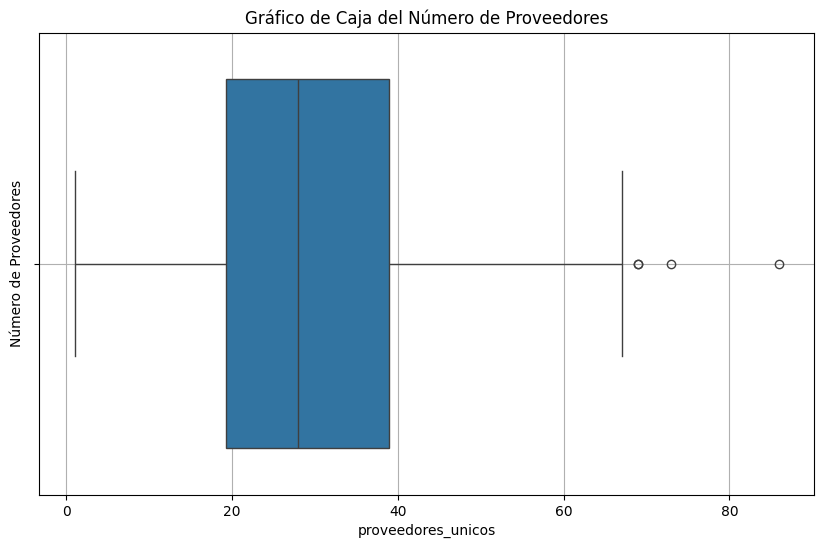

In [58]:
# Crear el gráfico de caja usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_tulumayo_sabana_peso_neto_dia['proveedores_unicos'])
plt.title('Gráfico de Caja del Número de Proveedores')
plt.ylabel('Número de Proveedores')
plt.grid(True)

# Mostrar el gráfico
plt.show()

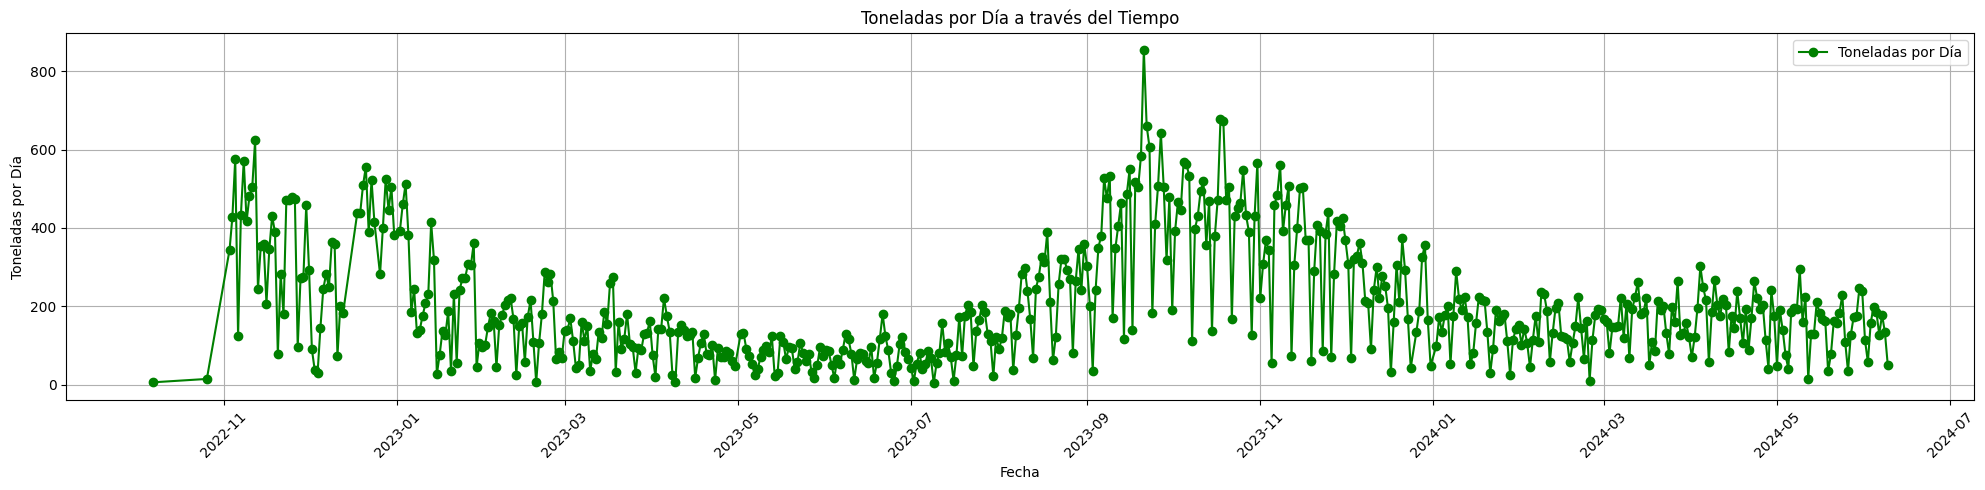

In [39]:
# Crear el gráfico de líneas para 'toneladas_dia'
plt.figure(figsize=(20, 5))
plt.plot(df_tulumayo_sabana_peso_neto_dia['FECHA'], df_tulumayo_sabana_peso_neto_dia['toneladas_sum'], marker='o', linestyle='-', color='green', label='Toneladas por Día')
plt.title('Toneladas por Día a través del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Toneladas por Día')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [49]:
df_tulumayo_sabana_peso_neto_dia['mes'] = df_tulumayo_sabana_peso_neto_dia['FECHA'].dt.to_period('M')
df_tulumayo_sabana_peso_neto_dia.head()

,FECHA,toneladas_sum,proveedores_unicos,registros_count,mes
0,2022-10-07,6.00,1,1,2022-10
1,2022-10-26,14.62,2,2,2022-10
2,2022-11-03,343.98,40,85,2022-11
3,2022-11-04,428.19,48,90,2022-11
4,2022-11-05,576.82,51,112,2022-11


In [56]:
# Contar los días presentes en cada mes
# ------------------------

dias_presentes = df_tulumayo_sabana_peso_neto_dia.groupby('mes')['FECHA'].count().reset_index()
dias_presentes.columns = ['mes', 'dias_desembarques']

# Generar un rango de fechas completo para contar los días totales en cada mes
rango_completo = pd.date_range(start=df_tulumayo_sabana_peso_neto_dia['FECHA'].min(), end=df_tulumayo_sabana_peso_neto_dia['FECHA'].max(), freq='D')
rango_completo_df = pd.DataFrame(rango_completo, columns=['FECHA'])
rango_completo_df['mes'] = rango_completo_df['FECHA'].dt.to_period('M')

# Contar los días totales en cada mes
dias_totales = rango_completo_df.groupby('mes')['FECHA'].count().reset_index()
dias_totales.columns = ['mes', 'dias_totales']

# Unir las dos tablas para obtener la cantidad de días presentes y no presentes en cada mes
resumen = pd.merge(dias_totales, dias_presentes, on='mes', how='left')
resumen['dias_desembarques'] = resumen['dias_desembarques'].fillna(0).astype(int)
resumen['dias_no_desembarques'] = resumen['dias_totales'] - resumen['dias_desembarques']

# Dias no presentes
dias_no_presentes = rango_completo_df[~rango_completo_df['FECHA'].isin(df_tulumayo_sabana_peso_neto_dia['FECHA'])]
dias_no_presentes_agrupados = dias_no_presentes.groupby('mes')['FECHA'].apply(list).reset_index()
dias_no_presentes_agrupados.columns = ['mes', 'lista_dias_no_presentes']

resumen = pd.merge(resumen, dias_no_presentes_agrupados, on='mes', how='left')
resumen['lista_dias_no_presentes'] = resumen['lista_dias_no_presentes'].fillna('[]')

resumen.tail(15)

,mes,dias_totales,dias_desembarques,dias_no_desembarques,lista_dias_no_presentes
6,2023-04,30,30,0,[]
7,2023-05,31,30,1,[2023-05-01 00:00:00]
8,2023-06,30,30,0,[]
9,2023-07,31,31,0,[]
10,2023-08,31,31,0,[]
11,2023-09,30,30,0,[]
12,2023-10,31,31,0,[]
13,2023-11,30,30,0,[]
14,2023-12,31,30,1,[2023-12-25 00:00:00]
15,2024-01,31,30,1,[2024-01-01 00:00:00]


In [ ]:
# Crear histograma para 'nro_provedores'
plt.figure(figsize=(10, 5))
plt.hist(df_tulumayo_sabana_peso_neto_dia['toneladas_sum'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma de Peso neto x día')
plt.xlabel('Toneladas Peso Neto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [19]:
# Agrupar por mes y contar el número de proveedores únicos y la cantidad de registros
resumen_por_mes_sabana = df_tulumayo_sabana.groupby('Mes').agg(
    proveedores_unicos=('PROVEEDOR', 'nunique'),
    cantidad_registros=('PROVEEDOR', 'size')
).reset_index()

resumen_por_mes_sabana.head()

,Mes,proveedores_unicos,cantidad_registros
0,2022-10,2,3
1,2022-11,268,2297
2,2022-12,270,2062
3,2023-01,262,1736
4,2023-02,218,1307


C:\Users\CESAR QUEZADA\AppData\Local\Temp\ipykernel_7008\2558919773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mes', y='proveedores_unicos', data=resumen_por_mes_sabana, palette='viridis')


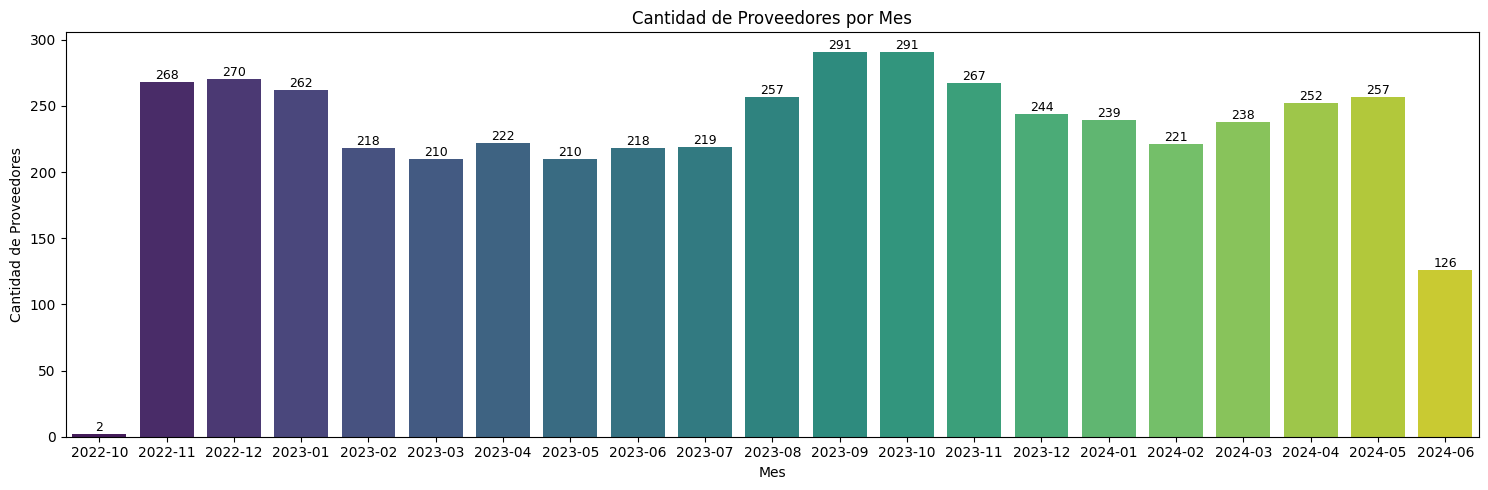

In [20]:
# Graficar la cantidad de proveedores por mes
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='Mes', y='proveedores_unicos', data=resumen_por_mes_sabana, palette='viridis')
plt.title('Cantidad de Proveedores por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Proveedores')
#plt.xticks(rotation=45)

# Agregar los valores de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [101]:
# Agrupar por mes y proveedor, y sumar las toneladas
monthly_grouped_df_sabana = df_tulumayo_sabana[['Mes', 'PROVEEDOR','PESO NETO']].groupby(['Mes', 'PROVEEDOR']).sum().reset_index()

# Para cada mes, obtener los top 10 proveedores por toneladas
top_proveedores_por_mes_sabana = monthly_grouped_df_sabana.sort_values(['Mes', 'PESO NETO'], ascending=[True, False]).groupby('Mes').head(15)

# Obtener lista de meses únicos
meses_unicos_sabana = top_proveedores_por_mes_sabana['Mes'].unique()

top_proveedores_por_mes_sabana.head(10)

,Mes,PROVEEDOR,PESO NETO
2,2023-01,AGRO FORESTAL PISCICOLA Y PECUARIA VIRGEN DE G...,697.11
187,2023-01,PALMA FRENTE PERU SAC,576.81
188,2023-01,PALMAGRO S.A.C.,562.02
227,2023-01,SOCIEDAD INMOBILIARIA ALPHA SAC,401.23
58,2023-01,EUSEBIA DIEGO RIVERA,151.74
7,2023-01,AGROPECUARIA PALMITAS DE ORO E.I.R.L,143.12
243,2023-01,VILLA SILVESTRE SAC,99.10
235,2023-01,UBERLINDA ALTEMIRA ENRIQUEZ NEYRA,84.34
124,2023-01,JULIA SATOMI HASHIGUCHI HASHIGUCHI,83.29
3,2023-01,AGRO SELVA TRES PALMAS SAC,83.23


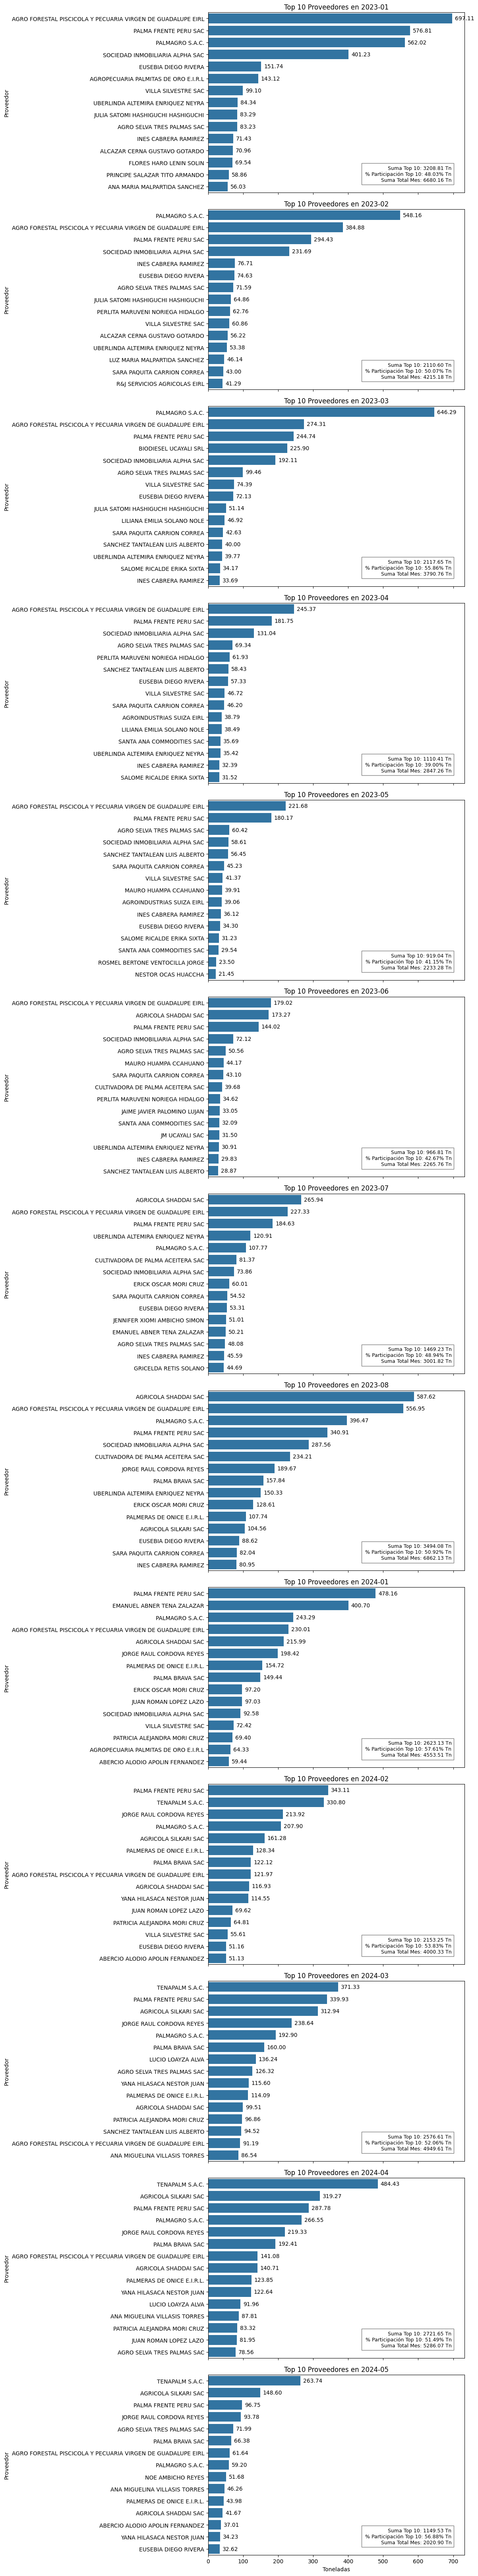

In [102]:
# Crear subplots para cada mes
num_meses = len(meses_unicos_sabana)
fig, axes = plt.subplots(num_meses, 1, figsize=(12, 5 * num_meses), sharex=True)

# Si solo hay un mes, axes no será una lista, así que lo convertimos en una lista
if num_meses == 1:
    axes = [axes]

# Graficar top 10 proveedores para cada mes
for i, mes in enumerate(meses_unicos_sabana):
    ax = axes[i]
    mes_data = top_proveedores_por_mes_sabana[top_proveedores_por_mes_sabana['Mes'] == mes]
    sns.barplot(x='PESO NETO', y='PROVEEDOR', data=mes_data, ax=ax)
    ax.set_title(f'Top 10 Proveedores en {mes}')
    ax.set_xlabel('Toneladas')
    ax.set_ylabel('Proveedor')

    # Agregar etiquetas con los valores de toneladas a la derecha de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0),  # Desplazamiento de 5 puntos a la derecha
                    textcoords='offset points')
    
     # Calcular las sumas de toneladas
    total_top_10 = mes_data['PESO NETO'].sum()
    total_mes = monthly_grouped_df_sabana[monthly_grouped_df_sabana['Mes'] == mes]['PESO NETO'].sum()
    pct_participacion = (total_top_10/total_mes)*100
    
    # Agregar texto con las sumas en la parte superior derecha del gráfico
    ax.text(0.95, 0.15, f'Suma Top 10: {total_top_10:.2f} Tn\n % Participación Top 10: {pct_participacion:.2f}% Tn\nSuma Total Mes: {total_mes:.2f} Tn', 
            ha='right', va='top', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))


plt.tight_layout()
plt.show()

# Analizando data de calidad

In [4]:
df_tulumayo_calidad.head()

,PROVEEDOR,PESO NETO,RACIMO VERDE (%),RACIMO MADURO (%),RACIMO SOBREMADURO (%),ESCOBAJO (%),PEDÚNCULO LARGO (%),RACIMO MAL FORMADO (%)
FECHA,,,,,,,,
2024-01-02,PASTOR MERCADO JOSE,3.88,0.011111,0.948148,0.037037,0.003704,0.022222,0.0
2024-01-02,PALMA FRENTE PERU S.A.C.,0.57,0.000000,0.866667,0.133333,0.000000,0.033333,0.0
2024-01-02,PALMA FRENTE PERU S.A.C.,1.78,0.007407,0.888889,0.088889,0.014815,0.022222,0.0
2024-01-02,PALMA FRENTE PERU S.A.C.,0.30,0.000000,0.714286,0.285714,0.000000,0.071429,0.0
2024-01-02,BELLOTA AIMITOMA TEOFILO RUBEN,0.73,0.014815,0.888889,0.096296,0.000000,0.037037,0.0


In [5]:
df_tulumayo_calidad.dtypes

PROVEEDOR                  object
PESO NETO                 float64
RACIMO VERDE (%)          float64
RACIMO MADURO (%)         float64
RACIMO SOBREMADURO (%)    float64
ESCOBAJO (%)              float64
PEDÚNCULO LARGO (%)       float64
RACIMO MAL FORMADO (%)    float64
dtype: object

In [93]:
# Creando variables de interés
# -------------------
# ----------------
# --------------

# Columna % Total
df_tulumayo_calidad['% Total'] = df_tulumayo_calidad['RACIMO VERDE (%)']+df_tulumayo_calidad['RACIMO MADURO (%)']+df_tulumayo_calidad['RACIMO SOBREMADURO (%)']+df_tulumayo_calidad['ESCOBAJO (%)']+df_tulumayo_calidad['PEDÚNCULO LARGO (%)']+df_tulumayo_calidad['RACIMO MAL FORMADO (%)']
df_tulumayo_calidad['Mes'] = df_tulumayo_calidad.index.to_period('m')

df_tulumayo_calidad.head()

,PROVEEDOR,PESO NETO,RACIMO VERDE (%),RACIMO MADURO (%),RACIMO SOBREMADURO (%),ESCOBAJO (%),PEDÚNCULO LARGO (%),RACIMO MAL FORMADO (%),% Total,Mes
FECHA,,,,,,,,,,
2024-01-02,PASTOR MERCADO JOSE,3.88,0.011111,0.948148,0.037037,0.003704,0.022222,0.0,1.022222,2024-01
2024-01-02,PALMA FRENTE PERU S.A.C.,0.57,0.000000,0.866667,0.133333,0.000000,0.033333,0.0,1.033333,2024-01
2024-01-02,PALMA FRENTE PERU S.A.C.,1.78,0.007407,0.888889,0.088889,0.014815,0.022222,0.0,1.022222,2024-01
2024-01-02,PALMA FRENTE PERU S.A.C.,0.30,0.000000,0.714286,0.285714,0.000000,0.071429,0.0,1.071429,2024-01
2024-01-02,BELLOTA AIMITOMA TEOFILO RUBEN,0.73,0.014815,0.888889,0.096296,0.000000,0.037037,0.0,1.037037,2024-01


In [12]:
df_tulumayo_calidad.Mes.unique()

<PeriodArray>
['2024-01', '2024-02', '2024-03', '2024-04']
Length: 4, dtype: period[M]

In [94]:
# Analizando Peso Neto por proveedor
# -----
# Agrupar por fecha y proveedor, y sumar las toneladas
df_tulumayo_calidad_peso_neto = df_tulumayo_calidad.groupby(['FECHA', 'PROVEEDOR']).agg(toneladas_sum=('PESO NETO', 'sum'),
                                                                                        registros_count=('PESO NETO', 'size')).reset_index()

df_tulumayo_calidad_peso_neto.head()

,FECHA,PROVEEDOR,toneladas_sum,registros_count
0,2024-01-02,AGRO FORESTAL PISCICOLA Y PECUARIA VIRGEN DE G...,9.40,1
1,2024-01-02,ARMILDA QUISPE QUIROZ,5.80,1
2,2024-01-02,BELLA CARMEN MARTEL TRUJILLO,0.76,1
3,2024-01-02,BELLOTA AIMITOMA TEOFILO RUBEN,2.33,3
4,2024-01-02,BONIFACIO MACHCO BARRON,1.58,2


In [96]:
# Agrupar por mes y contar el número de proveedores únicos y la cantidad de registros
resumen_por_mes_calidad = df_tulumayo_calidad.groupby('Mes').agg(
    proveedores_unicos=('PROVEEDOR', 'nunique'),
    cantidad_registros=('PROVEEDOR', 'size')
).reset_index()

resumen_por_mes_calidad.head()

,Mes,proveedores_unicos,cantidad_registros
0,2024-01,219,1326
1,2024-02,201,1068
2,2024-03,213,1205
3,2024-04,209,1212


C:\Users\usuario\AppData\Local\Temp\ipykernel_26364\377113761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mes', y='proveedores_unicos', data=resumen_por_mes_calidad, palette='viridis')


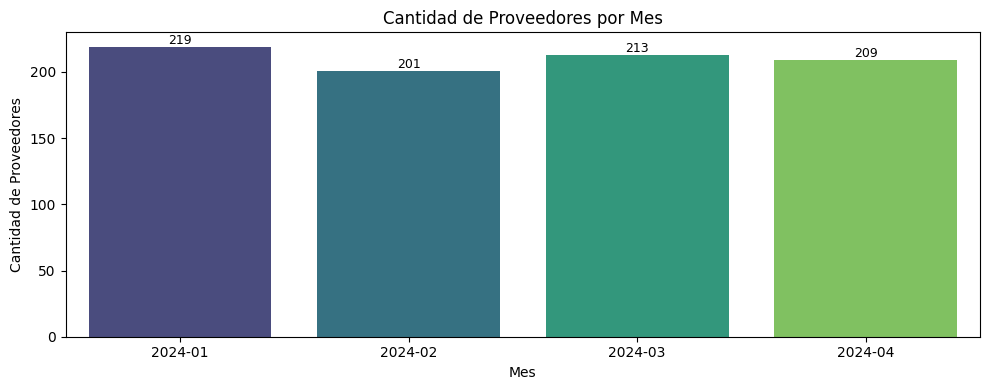

In [99]:
# Graficar la cantidad de proveedores por mes
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Mes', y='proveedores_unicos', data=resumen_por_mes_calidad, palette='viridis')
plt.title('Cantidad de Proveedores por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Proveedores')
#plt.xticks(rotation=45)

# Agregar los valores de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [100]:
# Agrupar por mes y proveedor, y sumar las toneladas
monthly_grouped_df = df_tulumayo_calidad[['Mes', 'PROVEEDOR','PESO NETO']].groupby(['Mes', 'PROVEEDOR']).sum().reset_index()

# Para cada mes, obtener los top 10 proveedores por toneladas
top_proveedores_por_mes = monthly_grouped_df.sort_values(['Mes', 'PESO NETO'], ascending=[True, False]).groupby('Mes').head(15)

# Obtener lista de meses únicos
meses_unicos = top_proveedores_por_mes['Mes'].unique()

top_proveedores_por_mes.head(10)

,Mes,PROVEEDOR,PESO NETO
165,2024-01,PALMA FRENTE PERU S.A.C.,467.86
47,2024-01,EMANUEL ABNER TENA ZALAZAR,373.54
166,2024-01,PALMAGRO S.A.C.,239.01
6,2024-01,AGRO FORESTAL PISCICOLA Y PECUARIA VIRGEN DE G...,227.25
4,2024-01,AGRICOLA SHADDAI S.A.C.,215.99
93,2024-01,JORGE RAUL CORDOVA REYES,195.80
167,2024-01,PALMERAS DE ONICE E.I.R.L.,154.72
164,2024-01,PALMA BRAVA S.A.C.,149.44
50,2024-01,ERICK OSCAR MORI CRUZ,101.76
100,2024-01,JUAN ROMAN LOPEZ LAZO,94.72


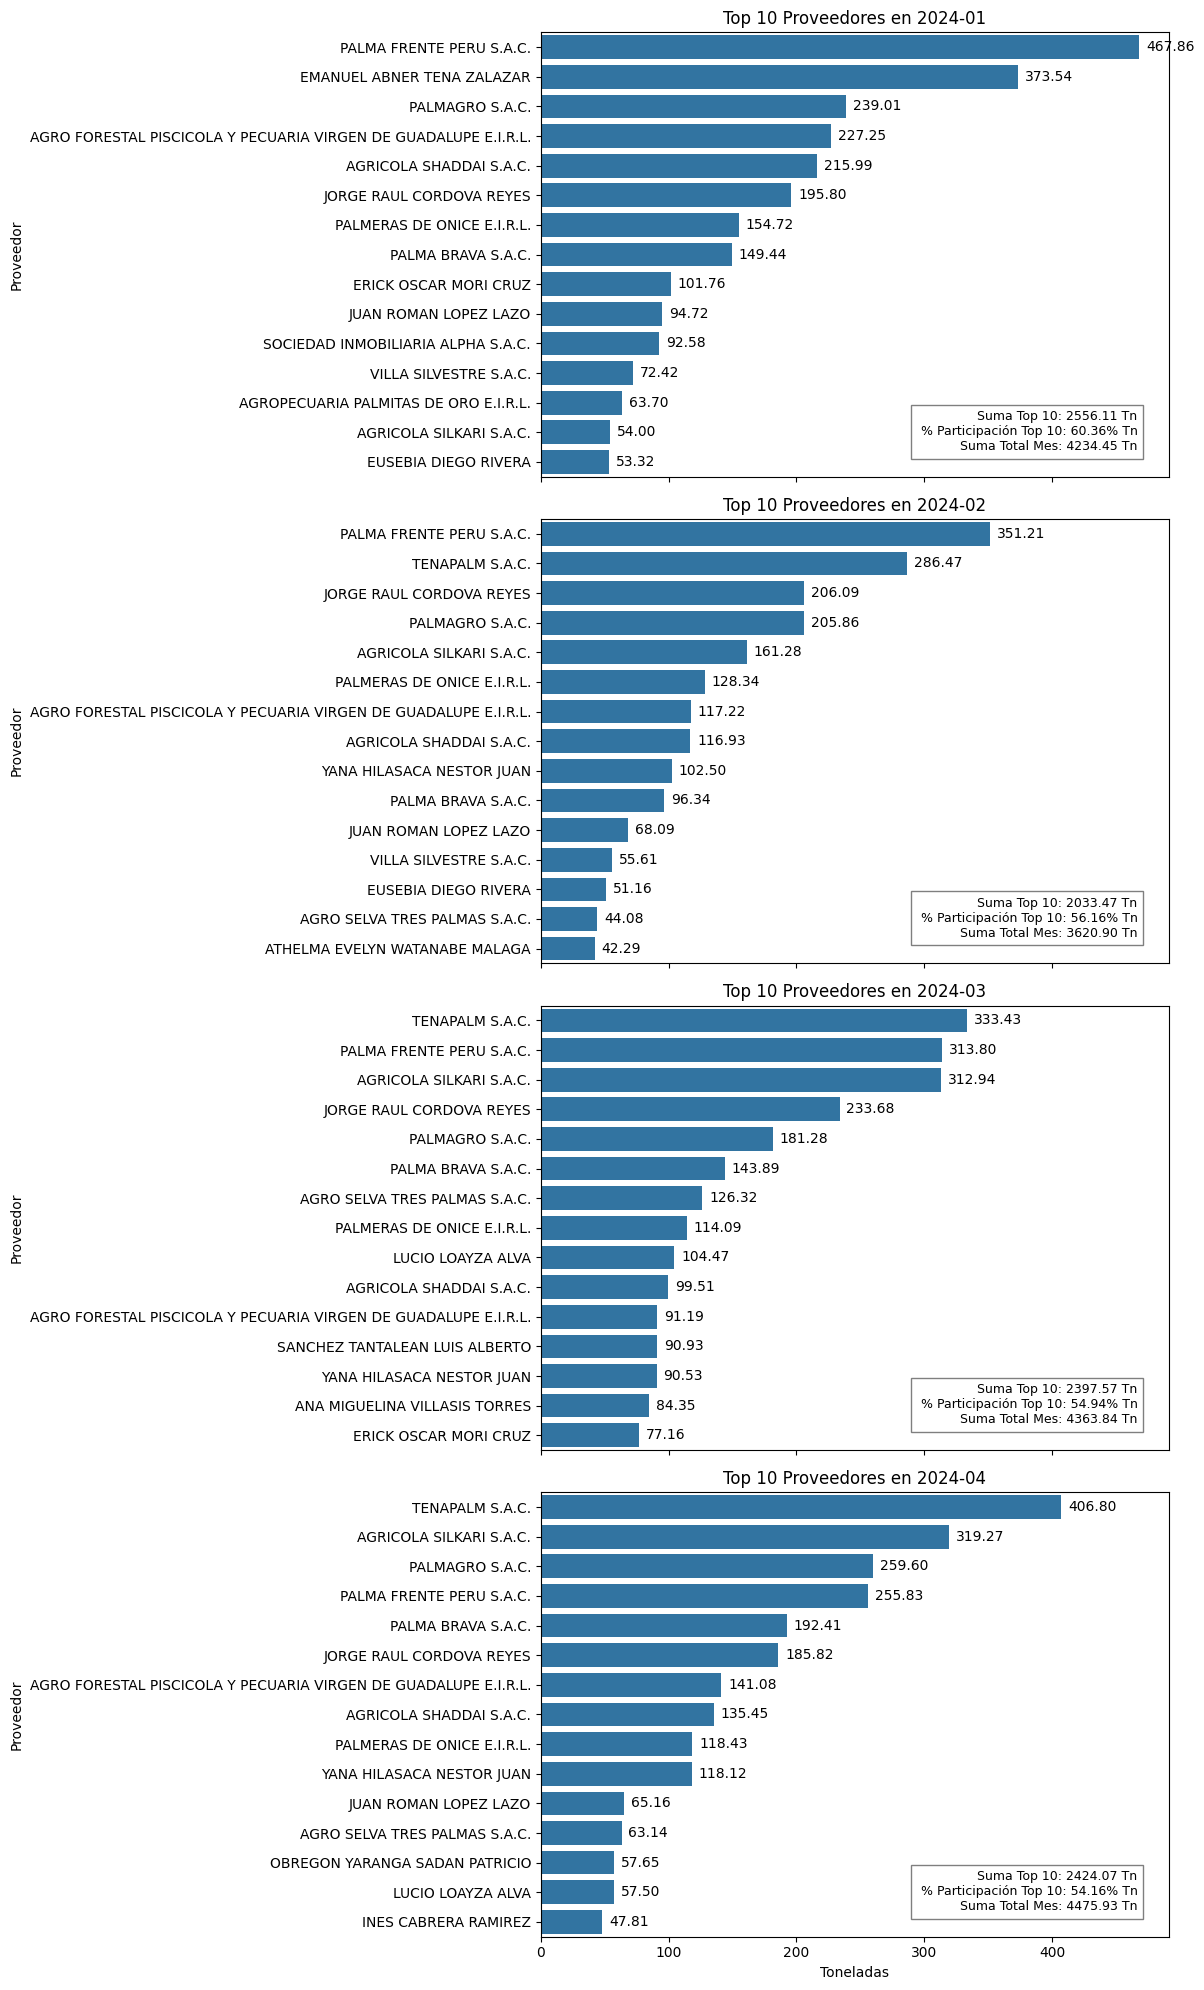

In [60]:
# Crear subplots para cada mes
num_meses = len(meses_unicos)
fig, axes = plt.subplots(num_meses, 1, figsize=(12, 5 * num_meses), sharex=True)

# Si solo hay un mes, axes no será una lista, así que lo convertimos en una lista
if num_meses == 1:
    axes = [axes]

# Graficar top 10 proveedores para cada mes
for i, mes in enumerate(meses_unicos):
    ax = axes[i]
    mes_data = top_proveedores_por_mes[top_proveedores_por_mes['Mes'] == mes]
    sns.barplot(x='PESO NETO', y='PROVEEDOR', data=mes_data, ax=ax)
    ax.set_title(f'Top 10 Proveedores en {mes}')
    ax.set_xlabel('Toneladas')
    ax.set_ylabel('Proveedor')

    # Agregar etiquetas con los valores de toneladas a la derecha de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0),  # Desplazamiento de 5 puntos a la derecha
                    textcoords='offset points')
    
     # Calcular las sumas de toneladas
    total_top_10 = mes_data['PESO NETO'].sum()
    total_mes = monthly_grouped_df[monthly_grouped_df['Mes'] == mes]['PESO NETO'].sum()
    pct_participacion = (total_top_10/total_mes)*100
    
    # Agregar texto con las sumas en la parte superior derecha del gráfico
    ax.text(0.95, 0.15, f'Suma Top 10: {total_top_10:.2f} Tn\n % Participación Top 10: {pct_participacion:.2f}% Tn\nSuma Total Mes: {total_mes:.2f} Tn', 
            ha='right', va='top', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))


plt.tight_layout()
plt.show()

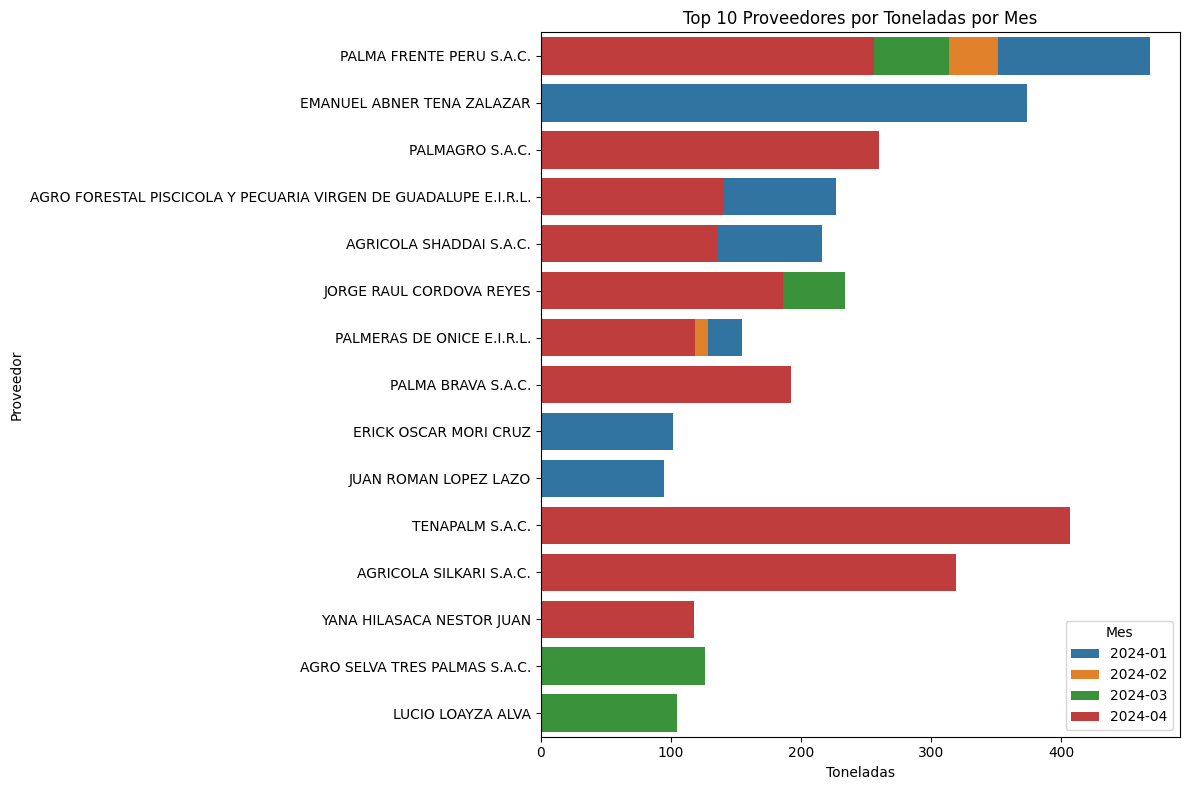

In [20]:
# Para cada mes, obtener los top 10 proveedores por toneladas
top_proveedores_por_mes = monthly_grouped_df.sort_values(['Mes', 'PESO NETO'], ascending=[True, False]).groupby('Mes').head(10)

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='PESO NETO', y='PROVEEDOR', hue='Mes', data=top_proveedores_por_mes, dodge=False)
plt.title('Top 10 Proveedores por Toneladas por Mes')
plt.xlabel('Toneladas')
plt.ylabel('Proveedor')
plt.legend(title='Mes')
plt.tight_layout()
plt.show()

# Analizando data de PERDIDAS

In [22]:
df_tulumayo_perdidas.head()

,TEA,RFF PROCESADO,P.A. ESCOBAJO (%),P.A. FIBRA (%),P.A. CÁSCARA (%),P.A. AGUA TD (%),P.A. SÓLIDO TD (%),P.A. ARENA (%),P.A. PROCESO (%)
FECHA,,,,,,,,,
2024-01-02,0.253595,288.350,0.010041,0.006984,0.000670,0.004131,0.001850,7.397303e-07,0.023677
2024-01-04,0.241197,236.574,0.008297,0.008845,0.000705,0.006152,0.002190,7.397303e-07,0.026190
2024-01-06,0.263096,236.457,0.002928,0.008063,0.000745,0.005614,0.002356,7.397303e-07,0.019706
2024-01-08,0.249366,334.344,0.002875,0.006662,0.000645,0.003875,0.001942,7.739709e-07,0.015999
2024-01-09,0.256849,195.601,0.004111,0.007255,0.000692,0.005490,0.001963,7.739709e-07,0.019511


In [44]:
df_tulumayo_perdidas.dtypes

TEA                   float64
CPO                   float64
RFF PROCESADO         float64
P.A. ESCOBAJO (%)     float64
P.A. FIBRA (%)        float64
P.A. CÁSCARA (%)      float64
P.A. AGUA TD (%)      float64
P.A. SÓLIDO TD (%)    float64
P.A. ARENA (%)        float64
P.A. PROCESO (%)      float64
P.A. ESCOBAJO         float64
P.A. FIBRA            float64
P.A. CÁSCARA          float64
P.A. AGUA TD          float64
P.A. SÓLIDO TD        float64
P.A. ARENA            float64
P.A. PROCESO          float64
dtype: object

In [46]:
# Creando variables
# ----------------------
# ----------------------
df_tulumayo_perdidas['CPO'] = df_tulumayo_perdidas['TEA']*df_tulumayo_perdidas['RFF PROCESADO'] # CPO obtenido

df_tulumayo_perdidas['P.A. ESCOBAJO'] = df_tulumayo_perdidas['P.A. ESCOBAJO (%)']*df_tulumayo_perdidas['RFF PROCESADO']
df_tulumayo_perdidas['P.A. FIBRA'] = df_tulumayo_perdidas['P.A. FIBRA (%)']*df_tulumayo_perdidas['RFF PROCESADO']
df_tulumayo_perdidas['P.A. CÁSCARA'] = df_tulumayo_perdidas['P.A. CÁSCARA (%)']*df_tulumayo_perdidas['RFF PROCESADO']
df_tulumayo_perdidas['P.A. AGUA TD'] = df_tulumayo_perdidas['P.A. AGUA TD (%)']*df_tulumayo_perdidas['RFF PROCESADO']
df_tulumayo_perdidas['P.A. SÓLIDO TD'] = df_tulumayo_perdidas['P.A. SÓLIDO TD (%)']*df_tulumayo_perdidas['RFF PROCESADO']
df_tulumayo_perdidas['P.A. ARENA'] = df_tulumayo_perdidas['P.A. ARENA (%)']*df_tulumayo_perdidas['RFF PROCESADO']
df_tulumayo_perdidas['P.A. PROCESO'] = df_tulumayo_perdidas['P.A. PROCESO (%)']*df_tulumayo_perdidas['RFF PROCESADO']

df_tulumayo_perdidas['P.A. TOTAL'] = df_tulumayo_perdidas['P.A. ESCOBAJO']+df_tulumayo_perdidas['P.A. FIBRA']+df_tulumayo_perdidas['P.A. CÁSCARA']+df_tulumayo_perdidas['P.A. AGUA TD']+df_tulumayo_perdidas['P.A. SÓLIDO TD']+df_tulumayo_perdidas['P.A. ARENA']+df_tulumayo_perdidas['P.A. PROCESO']

# Acomodando variables
columns_perdida = ['TEA','CPO','RFF PROCESADO','P.A. TOTAL','P.A. ESCOBAJO', 'P.A. FIBRA','P.A. CÁSCARA', 'P.A. AGUA TD', 'P.A. SÓLIDO TD', 'P.A. ARENA','P.A. PROCESO']

df_tulumayo_perdidas_tratadas = df_tulumayo_perdidas[columns_perdida]
df_tulumayo_perdidas_tratadas.head()


,TEA,CPO,RFF PROCESADO,P.A. TOTAL,P.A. ESCOBAJO,P.A. FIBRA,P.A. CÁSCARA,P.A. AGUA TD,P.A. SÓLIDO TD,P.A. ARENA,P.A. PROCESO
FECHA,,,,,,,,,,,
2024-01-02,0.253595,73.124,288.350,13.654462,2.895381,2.013907,0.193106,1.191159,0.533464,0.000213,6.827231
2024-01-04,0.241197,57.061,236.574,12.391807,1.962923,2.092513,0.166831,1.455350,0.518112,0.000175,6.195904
2024-01-06,0.263096,62.211,236.457,9.319358,0.692408,1.906498,0.176075,1.327360,0.557164,0.000175,4.659679
2024-01-08,0.249366,83.374,334.344,10.698367,0.961258,2.227290,0.215599,1.295535,0.649242,0.000259,5.349184
2024-01-09,0.256849,50.240,195.601,7.632799,0.804159,1.419014,0.135383,1.073824,0.383869,0.000151,3.816400


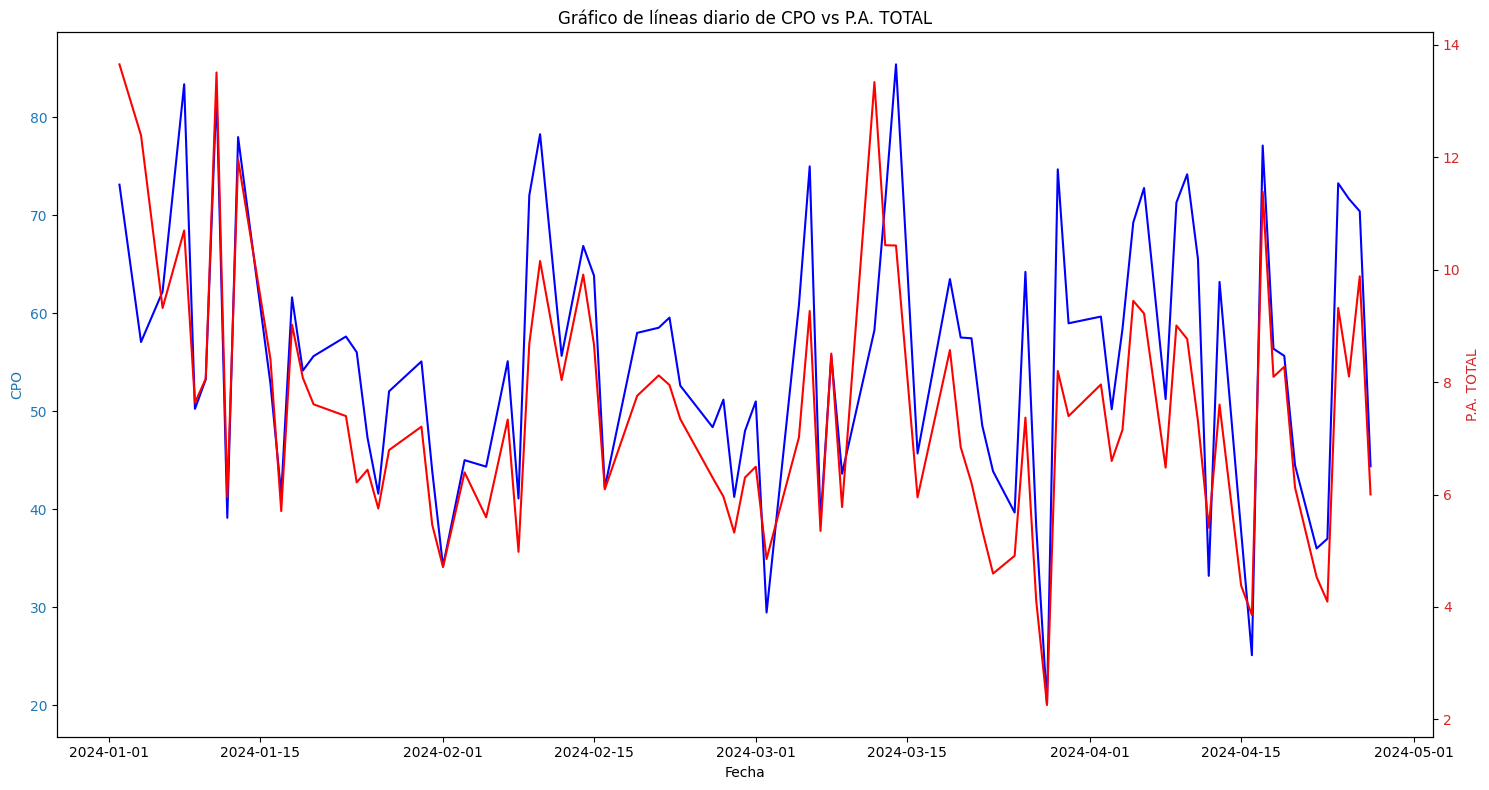

In [48]:
# Crear el gráfico de líneas con dos ejes y

var_1 = 'CPO'
var_2 = 'P.A. TOTAL'


fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel(var_1, color=color)
ax1.plot(df_tulumayo_perdidas_tratadas.index, df_tulumayo_perdidas_tratadas[var_1], label=var_1, color='b')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instancia un segundo eje que comparte el mismo eje x
color = 'tab:red'
ax2.set_ylabel(var_2, color=color)
ax2.plot(df_tulumayo_perdidas_tratadas.index, df_tulumayo_perdidas_tratadas[var_2], label=var_2, color='r')
ax2.tick_params(axis='y', labelcolor=color)

# Título y leyendas
plt.title(f'Gráfico de líneas diario de {var_1} vs {var_2}')
fig.tight_layout()  # Ajusta el layout para evitar la superposición de etiquetas

plt.show()